# Easy Visa Project
### Context:
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

*. Facilitate the process of visa approvals.

*. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

case_id: ID of each visa application

continent: Information of continent the employee

education_of_employee: Information of education of the employee

has_job_experience: Does the employee has any job experience? Y= Yes; N = No

requires_job_training: Does the employee require any job training? Y = Yes; N = No

no_of_employees: Number of employees in the employer's company

yr_of_estab: Year in which the employer's company was established

region_of_employment: Information of foreign worker's intended region of employment in the US.

prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.

unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.

full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position

case_status: Flag indicating if the Visa was certified or denied


## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

from sklearn import tree

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Importing Dataset

In [4]:
# importing dataset
visa_data = pd.read_csv("EasyVisa.csv")

# making a copy of the data
df = visa_data.copy()

## Data Overview

In [5]:
# observing the first five rows of the dataset
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
# observing the last five rows of the dataset
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
# viewing dimensions/shape of the data
df.shape

(25480, 12)

Note: There are 25,480 rows and 12 columns in our dataset

In [8]:
# Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


Note: There are 3 numerical type columns while the rest are object type

In [9]:
# Checking or missing values
df.isnull().values.any()

False

Note: There are no missing values in our dataset

In [11]:
# checking for duplicate values
df.duplicated().sum().any()

False

Note: There are no duplicate values in our dataset

# Exploratory Data Analysis (EDA)
EDA is an important part of any project involving data.
1. It is important to investigate and understand the data better before building a model with it.
2. A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
3. A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Leading Questions:

*. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

*. How does the visa status vary across different continents?

*. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

*. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

*. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?



## checking the statistical summary of the data.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


Note: 
    
*. The minimum number of employees has a negative value (-26) which is logically imposible. it shall be treated

*. About 75% of the employers companies were established on or before the year 2005

In [13]:
# data statistics
df.describe(include="object").T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


Note: 
    
*. Most of the employee are from Asia

*. 10234 of the employees have a Bachelor's degree.

*. More than half of the employees require job traning

*. 22773 of the employees are in full time position

#### Fixing the negative values in number of employees columns

In [14]:
# number negative values in the no_of_employee column
filt = df["no_of_employees"] < 0
df.loc[filt].shape

(33, 12)

Note: 33 rows have their number of employees as negative in our dataset

In [15]:
# taking the absolute values for number of employees
df["no_of_employees"] = np.abs(df["no_of_employees"])

#### Let's check the count of each unique category in each of the categorical variables

In [16]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [17]:
# checking the number of unique values
df["case_id"].unique()

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

In [18]:
# Dropping the case_id column since it adds no value to our data modelling.
df.drop("case_id", axis=1, inplace=True)

### Univariate Analysis

In [19]:
# Function to creat a histogram and boxplot together


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on number of employees

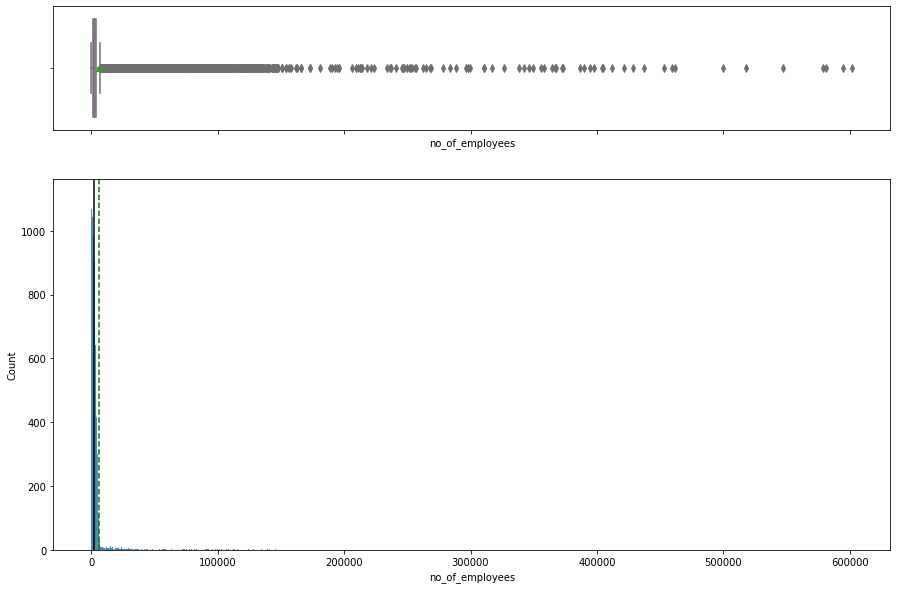

In [20]:
histogram_boxplot(df, "no_of_employees")

#### Observation

*. The distribution is not symetric

*. most od the companies have about 5000 employees or less

#### Observations on prevailing wage

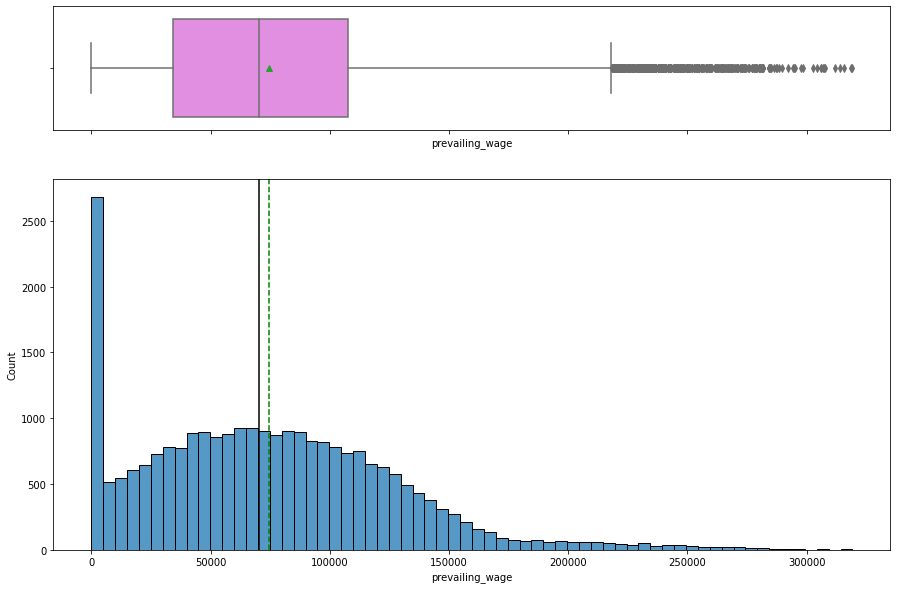

In [21]:
histogram_boxplot(df, "prevailing_wage")

#### Observation

*. The distribution is right skewed

*. only a few occupation had a prevailing wage greater than $200,000

In [22]:
# checking the observations which have less than 100 prevailing wage
filt = df["prevailing_wage"] < 100
df.loc[filt, "prevailing_wage"].count()

176

Note: There are 176 observations with less than 100 prevailing wages

In [23]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on continent

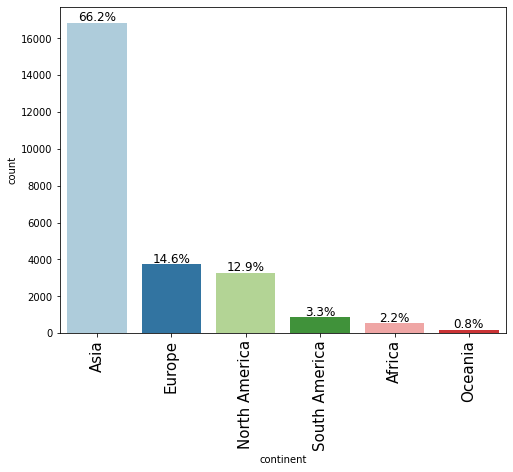

In [24]:
labeled_barplot(df, "continent", perc=True)

Note:
    
    *. 66.2% of the applicants Asians

    *. Only 0.8% of of the employees are from Oceania

#### Observations on education of employee

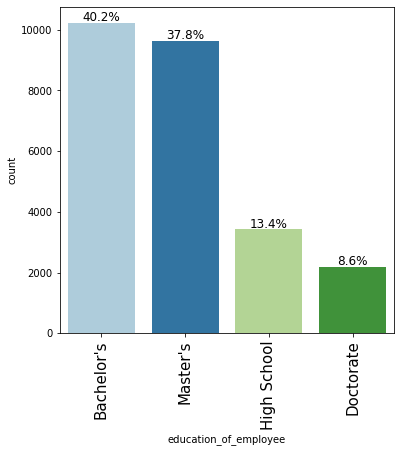

In [26]:
labeled_barplot(df, "education_of_employee", perc=True)

Note:

    *. Most of the employees are either bachelor's degree holders or Master's degree holders

    *. Only 8.6% of employees have a Doctorate degree

#### Observations on job experience

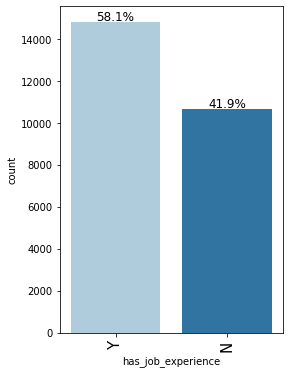

In [28]:
labeled_barplot(df, "has_job_experience", perc=True)

Note: 58.1% of the employees have job experience

#### Observations on job training

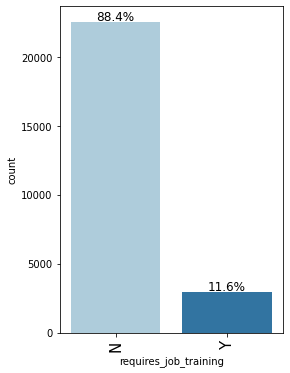

In [29]:
labeled_barplot(df, "requires_job_training", perc=True)

Note: 88.4% of employees do not require job training

#### Observations on region of employment

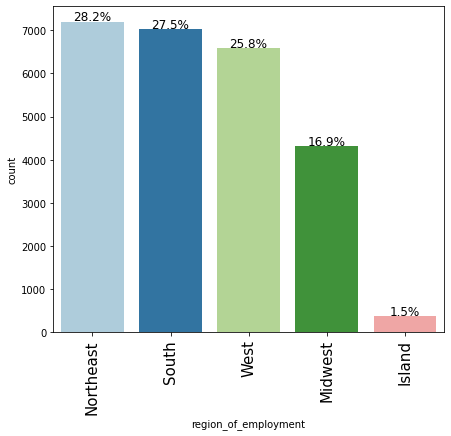

In [30]:
labeled_barplot(df, "region_of_employment", perc=True)

Note:

   *. Most of the employees prefer to work in the Northeastern, Southern and Western region of the USA

   *. 1.5% of the employees prefer to work in the Island

#### Observations on unit of wage

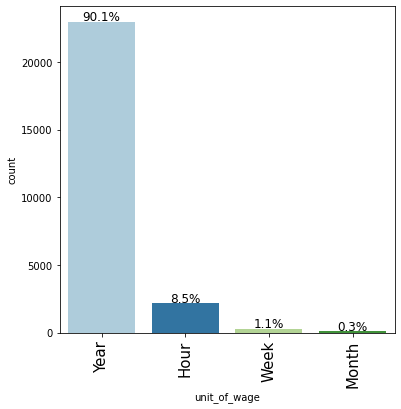

In [31]:
labeled_barplot(df, "unit_of_wage", perc=True)

#### Observations on full time position

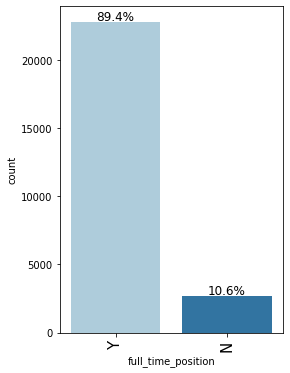

In [32]:
labeled_barplot(df, "full_time_position", perc=True)

Note: 89.4% of the employee go for full-time position

#### Observations on case status

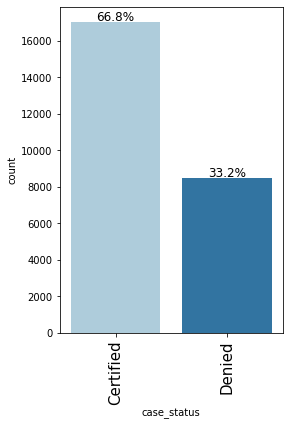

In [33]:
labeled_barplot(df, "case_status", perc=True)

Note: 33.2% of the employees were denied visa into the U.S while 66.8% were certified.

### Bivariate Analysis

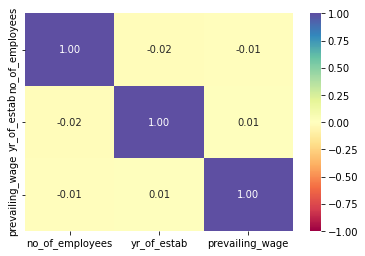

In [34]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Note: From the heat map, all the columns with numeric types are not correlated

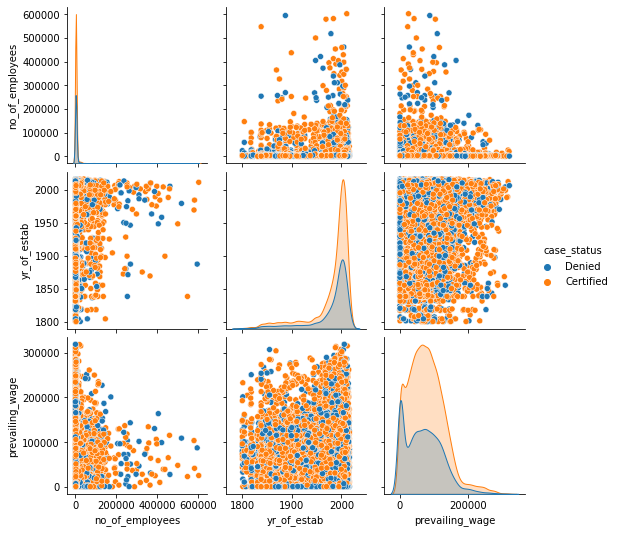

In [35]:
# plotting a pairplot
sns.pairplot(df, hue="case_status")
plt.show()

In [36]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [37]:
## function for barplot (stacked)
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    tab1.rename(columns={"All": "Total"}, inplace=True)
    tab1[f"% {tab1.columns[0]}"] = (tab1.iloc[:, 0] / tab1.iloc[:, 2]) * 100
    tab1[f"% {tab1.columns[1]}"] = (tab1.iloc[:, 1] / tab1.iloc[:, 2]) * 100
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied  Total  % Certified   % Denied
education_of_employee                                                  
All                        17018    8462  25480    66.789639  33.210361
Bachelor's                  6367    3867  10234    62.214188  37.785812
High School                 1164    2256   3420    34.035088  65.964912
Master's                    7575    2059   9634    78.627777  21.372223
Doctorate                   1912     280   2192    87.226277  12.773723
------------------------------------------------------------------------------------------------------------------------


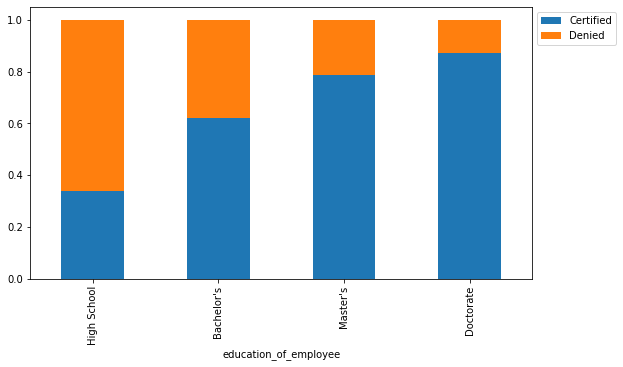

In [38]:
stacked_barplot(df, "education_of_employee", "case_status")

Note:
    
*. 62.7% of employees whose visas were certified had bachalor's degree.

*. Almost all employees with docotate degree had there visas certified except for the unlucky 12.7%

*. 78% of master's degree holders were granted visa

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

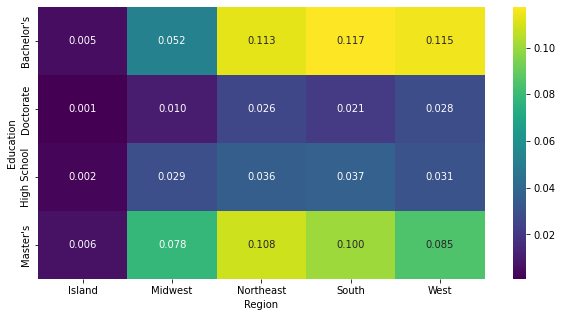

In [39]:
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(
        df["education_of_employee"], df["region_of_employment"], normalize=True
    ),
    annot=True,
    fmt=".3f",
    cmap="viridis",
)
plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

Note: The southern and western regions are more drawn to employees with bachelor's degree

#### Let's have a look at the percentage of visa certifications across each regio

case_status           Certified  Denied  Total  % Certified   % Denied
region_of_employment                                                  
All                       17018    8462  25480    66.789639  33.210361
Northeast                  4526    2669   7195    62.904795  37.095205
West                       4100    2486   6586    62.253265  37.746735
South                      4913    2104   7017    70.015676  29.984324
Midwest                    3253    1054   4307    75.528210  24.471790
Island                      226     149    375    60.266667  39.733333
------------------------------------------------------------------------------------------------------------------------


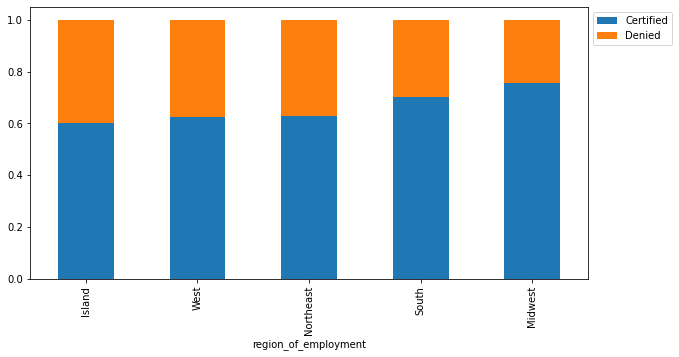

In [40]:
stacked_barplot(df, "region_of_employment", "case_status")

Note: 75.5% of employee of midwest region had their visa certified

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied  Total  % Certified   % Denied
continent                                                      
All                17018    8462  25480    66.789639  33.210361
Asia               11012    5849  16861    65.310480  34.689520
North America       2037    1255   3292    61.877278  38.122722
Europe              2957     775   3732    79.233655  20.766345
South America        493     359    852    57.863850  42.136150
Africa               397     154    551    72.050817  27.949183
Oceania              122      70    192    63.541667  36.458333
------------------------------------------------------------------------------------------------------------------------


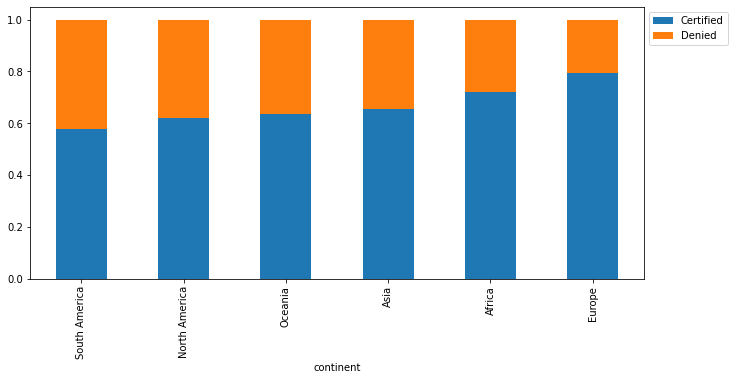

In [41]:
stacked_barplot(df, "continent", "case_status")

Note: Europe has the highest number of certified employees with 79.2% of them having been granted visa

#### Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied  Total  % Certified   % Denied
has_job_experience                                                  
All                     17018    8462  25480    66.789639  33.210361
N                        5994    4684  10678    56.134108  43.865892
Y                       11024    3778  14802    74.476422  25.523578
------------------------------------------------------------------------------------------------------------------------


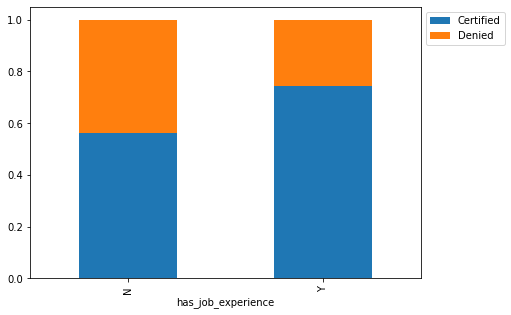

In [42]:
stacked_barplot(df, "has_job_experience", "case_status")

Note:
    
*. People with job experiece stand more chances of having thier visa certified

*. 74.47% of employees with job experience had their visa granted

#### Do the employees who have prior work experience require any job training?

requires_job_training      N     Y  Total        % N        % Y
has_job_experience                                             
All                    22525  2955  25480  88.402669  11.597331
N                       8988  1690  10678  84.173066  15.826934
Y                      13537  1265  14802  91.453858   8.546142
------------------------------------------------------------------------------------------------------------------------


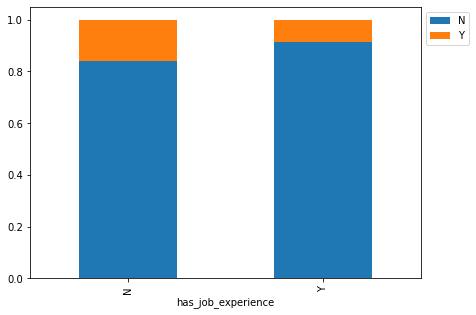

In [43]:
stacked_barplot(df, "has_job_experience", "requires_job_training")

Note: employees with no job experience require job training than those with prior job experience

#### Let's analyze the data and see if the visa status changes with the prevailing wage

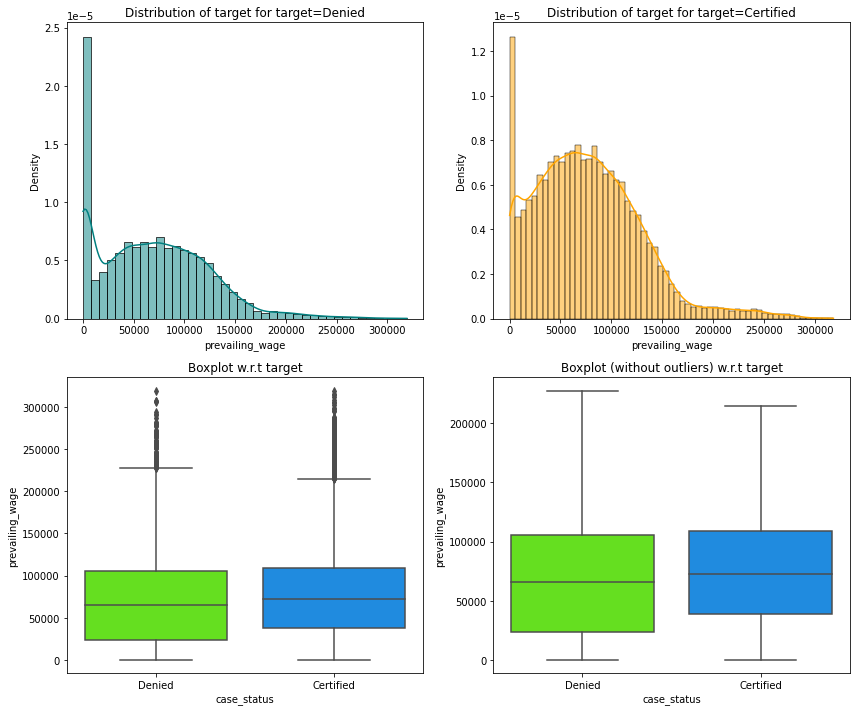

In [44]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

Note:
    
*. the distribution of prevailing wage for both certified and denied employees are right skewed

*. there is no significat change in visa stutus due prevailing wage

#### Checking if the prevailing wage is similar across all the regions of the US

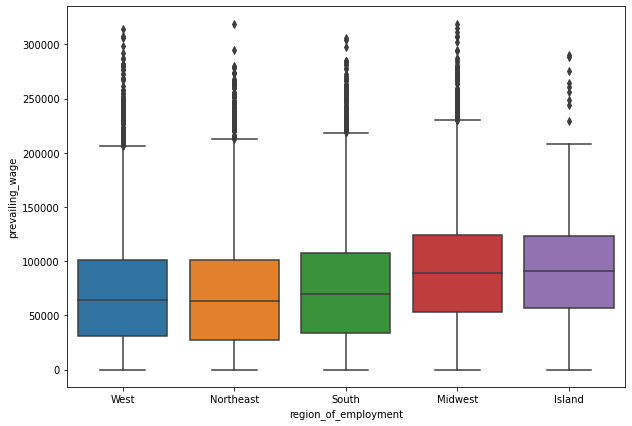

In [45]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage")
plt.show()

Note: The median prevailing wages are higher in the Midwestern and island regions

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied  Total  % Certified   % Denied
unit_of_wage                                                  
All               17018    8462  25480    66.789639  33.210361
Year              16047    6915  22962    69.885027  30.114973
Hour                747    1410   2157    34.631433  65.368567
Week                169     103    272    62.132353  37.867647
Month                55      34     89    61.797753  38.202247
------------------------------------------------------------------------------------------------------------------------


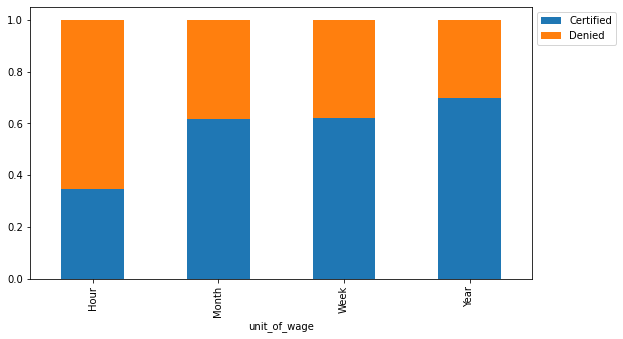

In [46]:
stacked_barplot(df, "unit_of_wage", "case_status")

Note: employees with yearly unit wage stand more chance of having thier visas granted
Data Preprocessing

# Data Preprocessing

1. Missing value treatment (if needed)

2. Feature engineering

3. Outlier detection and treatment (if needed)

4. Preparing data for modeling

5. Any other preprocessing steps (if needed)

### Outlier Check

Let's check for outliers in the data.

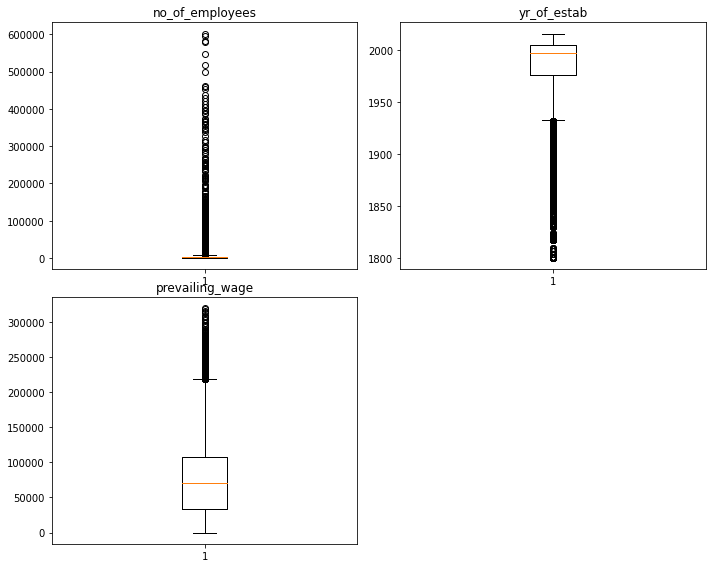

In [47]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 8))

for i, variable in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Note: We will not be treating the outliers since all are genuine values.

### Data Preparation for modeling

*. We want to predict which visa will be certified.

*. Before we proceed to build a model, we'll have to encode categorical features.

*. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

#### Let's encode case_status column. converting Certified to 1 and Denied as 0 for further analysis

In [48]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [49]:
X = df.drop(["case_status"], axis=1)
Y = df["case_status"]


# creating dummies
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

In [50]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


### Model can make wrong predictions as:
1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?

*. Both the cases are important as:

*. If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

*. If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

### How to reduce the losses?

*. F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.

*. We will use balanced class weights so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

*. The model_performance_classification_sklearn function will be used to check the model performance of models.

*. The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [51]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [52]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Building Decision Tree, bagging and boosting models

## Decision Tree - Model Building and Hyperparameter Tuning

#### Decision Tree Model

In [54]:
# building a decision tree model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training set

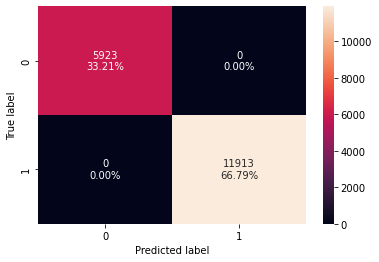

In [55]:
# creating confusion matrix
confusion_matrix_sklearn(model, X_train, y_train)

In [56]:
# model performance on train data
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

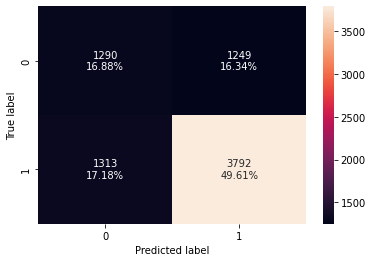

In [57]:
# creating confusion matrix
confusion_matrix_sklearn(model, X_test, y_test)

In [58]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.664835,0.742801,0.752232,0.747487


Note: 

*. The decision tree is overfitting the training data.
    
*. Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Decision Tree

In [59]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

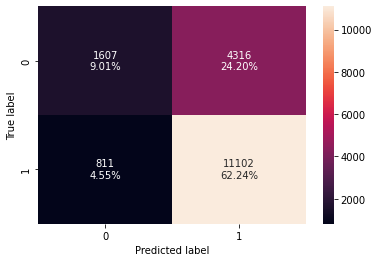

In [60]:
# creating confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [61]:
# checking performance for train data on tuned estimator
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
dtree_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.712548,0.931923,0.720067,0.812411


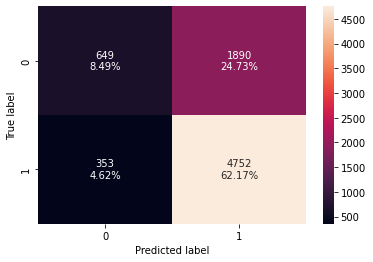

In [62]:
# creating confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [63]:
# checking performance for test data on tuned estimator
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
dtree_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.706567,0.930852,0.715447,0.809058


Note:

*. The overfitting has reduced and the test f1-score has increased.

*. Let's try some other models.

# Bagging - Model Building and Hyperparameter Tuning

### Bagging Classifier

In [64]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

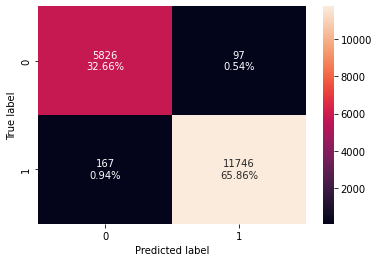

In [65]:
# creating confusion matrix for train data on bagggind classifier
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [66]:
# checking performance on train data for bagging classifier
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.985198,0.985982,0.99181,0.988887


#### Checking model performance on test set

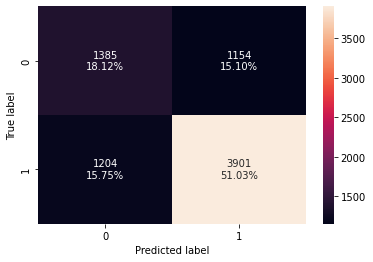

In [67]:
# creating confusion matrix for test data on bagggind classifier
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [68]:
# checking performance on test data for bagging classifier
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.691523,0.764153,0.771711,0.767913


Note:
    
*. bagging classifier is giving a lower test f1-score than decision trees but it is overfitting the training data.

*. Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Bagging Classifier

In [69]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9],
    "max_features": [0.7, 0.9],
    "n_estimators": np.arange(90, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=100,
                  random_state=1)

#### Checking model performance on training set

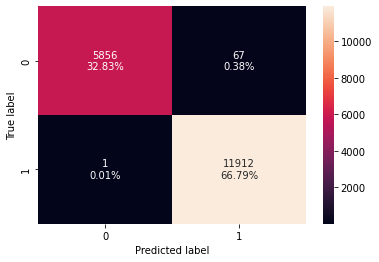

In [70]:
# creating confusion matrix for train data on bagggind classifier (tuned)
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [71]:
# checking performance for train data on tuned bagging estimator
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.996187,0.999916,0.994407,0.997154


#### Checking model performance on test set

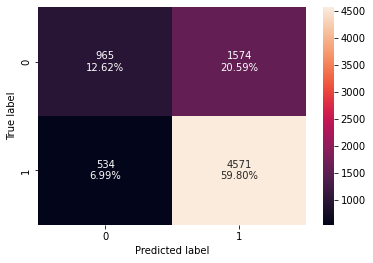

In [72]:
# creating confusion matrix for test data on bagggind classifier (tuned)
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [73]:
# checking performance for test data on tuned bagging estimator
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.724228,0.895397,0.743857,0.812622


Note:
    
*. The test F1 score improved but the training model is still overfitting

*. let try other models

# Random Forest Model

In [74]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking model performance on training set

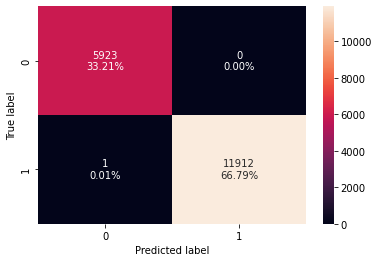

In [75]:
# Creating confusion matrix on train data for random forest
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [76]:
# Calculating different metrics on train data for random forest
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999944,0.999916,1.0,0.999958


#### Checking model performance on test set

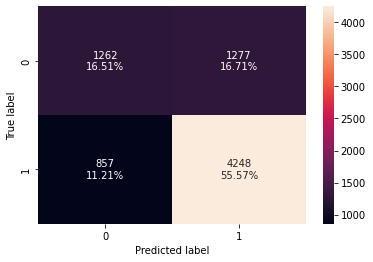

In [77]:
# Creating confusion matrix on test data for random forest
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [78]:
# Calculating different metrics on test data for random forest
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.720827,0.832125,0.768869,0.799247


Note: 

*. Random forest is giving a lower test f1-score than tuned bagging estimator and it is overfitting the training data.

*. Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - Random Forest

In [79]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

#### Checking model performance on training set (random forest tuned)

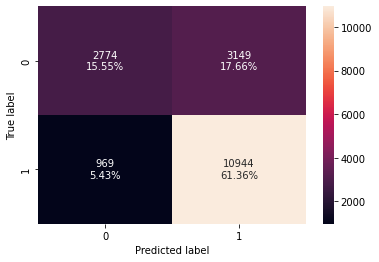

In [80]:
# Creating confusion matrix on train data for random forest
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [81]:
# Calculating different metrics on train data for random forest(tuned)
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.769119,0.91866,0.776556,0.841652


#### Checking model performance on test set (random forest tuned)

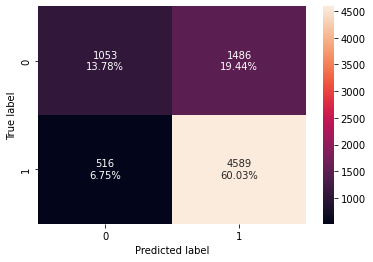

In [82]:
# Creating confusion matrix on test data for random forest
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [83]:
# Calculating different metrics on test data for random forest(tuned)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.738095,0.898923,0.755391,0.82093


Note:

*. This is a good model.

*. The model in not an overfit and the model performance has improved.

*. The test recall and test f1-score have increased.

# Boosting - Model Building and Hyperparameter Tuning

## AdaBoost Classifier

In [84]:
# fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training set for AdaBoost Classifier

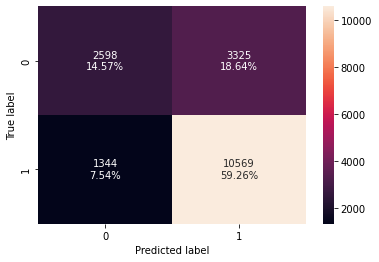

In [85]:
# Creating confusion matrix on train data for AdaBoost Classifier
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [86]:
# Calculating different metrics on train data for AdaBoost Classifier
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
ab_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.738226,0.887182,0.760688,0.81908


#### Checking model performance on test set

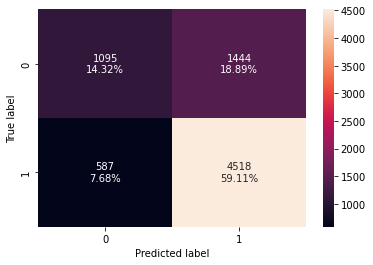

In [87]:
# Creating confusion matrix on test data for AdaBoost Classifier
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [88]:
# Calculating different metrics on test data for AdaBoost Classifier
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
ab_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.734301,0.885015,0.757799,0.816481


Note: Adaboost is giving more generalized performance than previous models but the test f1-score is too lower than that of tuned random forest.

### Hyperparameter Tuning - AdaBoost Classifier

In [89]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training set for AdaBoost Classifier

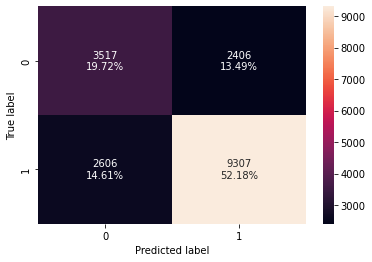

In [90]:
# Creating confusion matrix on train data for AdaBoost Classifier (tuned)
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [91]:
# Calculating different metrics on train data for AdaBoost Classifier (tuned)
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.718995,0.781247,0.794587,0.787861


#### Checking model performance on test set for AdaBoost Classifier

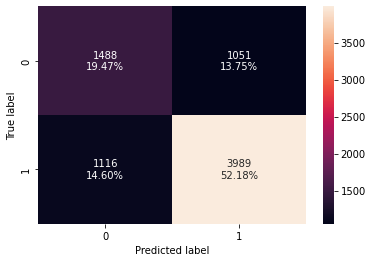

In [92]:
# Creating confusion matrix on test data for AdaBoost Classifier (tuned)
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [93]:
# Calculating different metrics on test data for AdaBoost Classifier (tuned)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781391,0.791468,0.786397


Note: Although the model is a generalised model, the performance decreased significantly compared to the untuned AdaBoost classifier

# Gradient Boosting Classifier

In [94]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Checking model performance on training set for Gradient Boosting Classifier

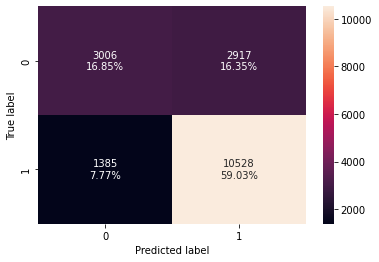

In [95]:
# Creating confusion matrix on train data for Gradient Boosting Classifier
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [96]:
# Calculating different metrics on train data for Gradient Boosting Classifier
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
gb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758802,0.88374,0.783042,0.830349


#### Checking model performance on test set for Gradient Boosting Classifier

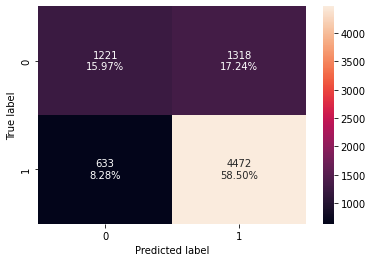

In [97]:
# Creating confusion matrix on test data for Gradient Boosting Classifier
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [98]:
# Calculating different metrics on test data for Gradient Boosting Classifier
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
gb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.744767,0.876004,0.772366,0.820927


Note:
    
*. The Model is a generalized one. There are no overfitting

*. Its test performance is slightly better than the random forest classifier

*. Let's try using AdaBoost classifier as the estimator for initial predictions

### Gradient Boosting Classifier using AdaBoost classifier as the estimator for initial predictions

In [99]:
gbc_init = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)
gbc_init.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

#### Checking model performance on training set for Gradient Boosting (init=AdaBoostClassifier)

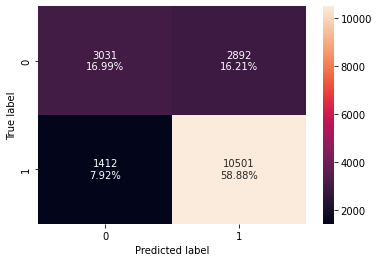

In [100]:
# Creating confusion matrix on train data for Gradient Boosting Classifier (init=AdaBoostClassifier)
confusion_matrix_sklearn(gbc_init, X_train, y_train)

In [101]:
# Calculating different metrics on train data for Gradient Boosting Classifier (init=AdaBoostClassifier)
gb_classifier_init_train_perf = model_performance_classification_sklearn(
    gbc_init, X_train, y_train
)
gb_classifier_init_train_perf

,Accuracy,Recall,Precision,F1
0,0.75869,0.881474,0.784066,0.829922


#### Checking model performance on test set for Gradient Boosting (init=AdaBoostClassifier)

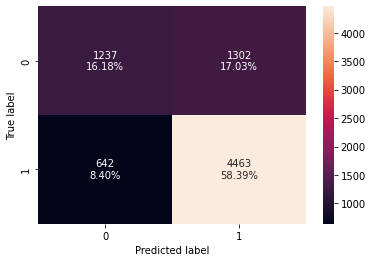

In [102]:
# Creating confusion matrix on test data for Gradient Boosting Classifier (init=AdaBoostClassifier)
confusion_matrix_sklearn(gbc_init, X_test, y_test)

In [103]:
# Calculating different metrics on test data for Gradient Boosting Classifier (init=AdaBoostClassifier)
gb_classifier_init_test_perf = model_performance_classification_sklearn(
    gbc_init, X_test, y_test
)
gb_classifier_init_test_perf

,Accuracy,Recall,Precision,F1
0,0.745683,0.874241,0.774154,0.821159


Note:
    
*. The model is generalized

*. This model has test performance is better than all the models so far

*. Lets see if we can do better with tuning

### Hyperparameter Tuning - Gradient Boosting Classifier

In [104]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking model performance on training set for Gradient Boosting Classifier (tuned)

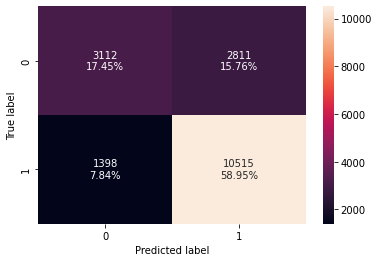

In [105]:
# Creating confusion matrix on test data for Gradient Boosting Classifier (tuned)
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [106]:
# Calculating different metrics on train data for Gradient Boosting Classifier(tuned)
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.764017,0.882649,0.789059,0.833234


#### Checking model performance on test set Gradient Boosting Classifier (tuned)

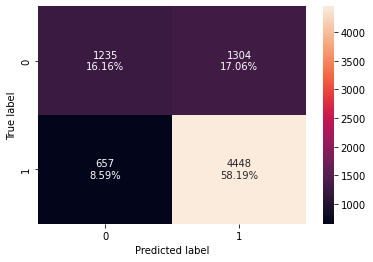

In [107]:
# Creating confusion matrix on test data for Gradient Boosting Classifier (tuned)
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [108]:
# Calculating different metrics on test data for Gradient Boosting Classifier(tuned)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743459,0.871303,0.773296,0.819379


Note: There is a slight decrease in test performance compareed the untuned model

# XGBoost Classifier

In [109]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1, ...)

#### Checking model performance on training set XGBoost Classifier

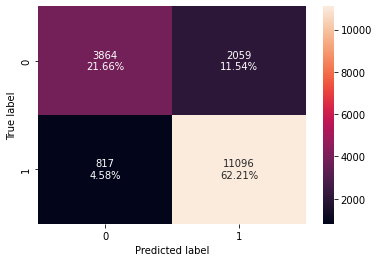

In [110]:
# Creating confusion matrix on train data for XGBoost Classifier
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [111]:
# Calculating different metrics on train data for XGBoost Classifier
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
xgb_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.931419,0.843482,0.885272


#### Checking model performance on test set XGBoost Classifier

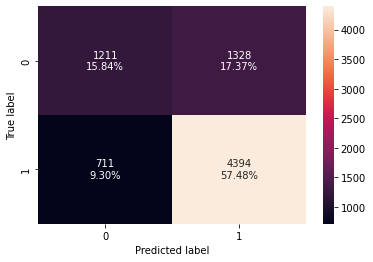

In [112]:
# Creating confusion matrix on test data for XGBoost Classifier
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [116]:
# Calculating different metrics on test data for XGBoost Classifier
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
xgb_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733255,0.860725,0.767913,0.811675


Note:
    
*. xgboost classifier is slightly overfitting the training data.

*. Let's try hyperparameter tuning and see if the model performance improves.

### Hyperparameter Tuning - XGBoost Classifier

In [117]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1, ...)

#### Checking model performance on training set for XGBoost Classifier (tuned)

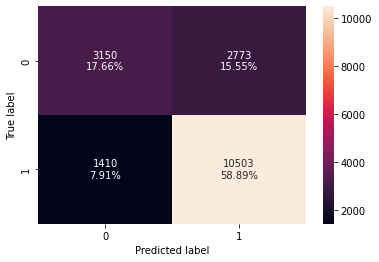

In [118]:
# Creating confusion matrix on train data for XGBoost Classifier (tuned)
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [119]:
# Calculating different metrics on train data for XGBoost Classifier(tuned)
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.765474,0.881642,0.791127,0.833935


#### Checking model performance on test set for XGBoost Classifier (tuned)

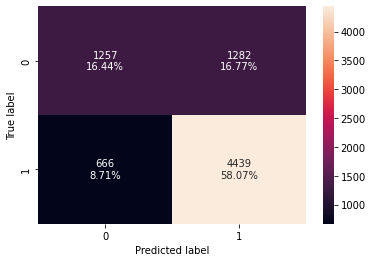

In [120]:
# Creating confusion matrix on test data for XGBoost Classifier (tuned)
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [121]:
# Calculating different metrics on test data for XGBoost Classifier(tuned)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74516,0.86954,0.775913,0.820063


Note:
    
*. The model is more generalized, overfitting has reduced

*. There is slight improvement in the model performance compare to the untuned model.

# Stacking Classifier

In [122]:
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weig...
                                                 feature_types=None, gamma=5,
                                                 gpu_id=-1,
                                                 grow_policy='depthwise',
                                                 importance_type=None,
                                                 interaction_constraints='',
                                                 learning_rate=0.1, max_bin=256,
                                                 max_cat_threshold=64,
                                                 max_cat_to_onehot=4,
                                                 max_delta_step=0, max_depth=6,
                                                 max_leaves=0,
                                                 min_child_weight=1,
                                                 missing=nan,
                                                 monotone_constraints='()',
                                                 n_estimators=200, n_jobs=0,
                                                 num_parallel_tree=1,
                                                 predictor='auto',
                                                 random_state=1, ...))

#### Checking model performance on training set for Stacking Classifier

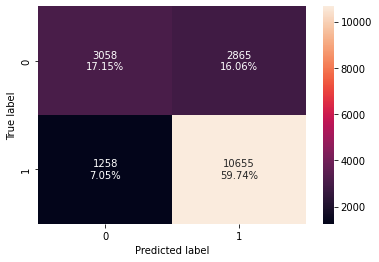

In [123]:
# Creating confusion matrix on train data for Stacking Classifier
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [124]:
# Calculating different metrics on train data for Stacking Classifier
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.768838,0.894401,0.788092,0.837888


#### Checking model performance on test set for Stacking Classifier

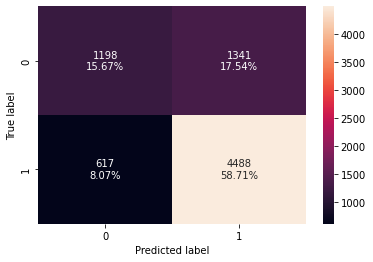

In [125]:
# Creating confusion matrix on test data for Stacking Classifier
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [126]:
# Calculating different metrics on test data for Stacking Classifier
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.743851,0.879138,0.769943,0.820926


Note:
    
*. The model is generalized and did well on the testing data

*. The stacking classifier is giving a similar performance as compared to Gradient Boost Classifier.

# Model Performance Comparison and Conclusions

### training performance comparison

In [127]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gb_classifier_init_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Gradient Boost Init",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Gradient Boost Init,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.996187,0.999944,0.769119,0.738226,0.718995,0.758802,0.758690,0.764017,0.838753,0.765474,0.768838
Recall,1.0,0.931923,0.985982,0.999916,0.999916,0.918660,0.887182,0.781247,0.883740,0.881474,0.882649,0.931419,0.881642,0.894401
Precision,1.0,0.720067,0.991810,0.994407,1.000000,0.776556,0.760688,0.794587,0.783042,0.784066,0.789059,0.843482,0.791127,0.788092
F1,1.0,0.812411,0.988887,0.997154,0.999958,0.841652,0.819080,0.787861,0.830349,0.829922,0.833234,0.885272,0.833935,0.837888


### testing performance comparison

In [128]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gb_classifier_init_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Gradient Boost Init",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Gradient Boost Init,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.691523,0.724228,0.720827,0.738095,0.734301,0.716510,0.744767,0.745683,0.743459,0.733255,0.745160,0.743851
Recall,0.742801,0.930852,0.764153,0.895397,0.832125,0.898923,0.885015,0.781391,0.876004,0.874241,0.871303,0.860725,0.869540,0.879138
Precision,0.752232,0.715447,0.771711,0.743857,0.768869,0.755391,0.757799,0.791468,0.772366,0.774154,0.773296,0.767913,0.775913,0.769943
F1,0.747487,0.809058,0.767913,0.812622,0.799247,0.820930,0.816481,0.786397,0.820927,0.821159,0.819379,0.811675,0.820063,0.820926


Note:
    
*. Some of the models are overfitting the training data in terms of f1-score.

*. The Gradient Boost Classifier has given the second-highest test f1-score (0.820927) and is not overfitting the training data.

*. The 'Gradient Boost Init' is giving the highest f1-score on the test data (0.821159) and is giving a more generalized performance as compared to the Gradient Boost Classifier.


# Important features of the final model

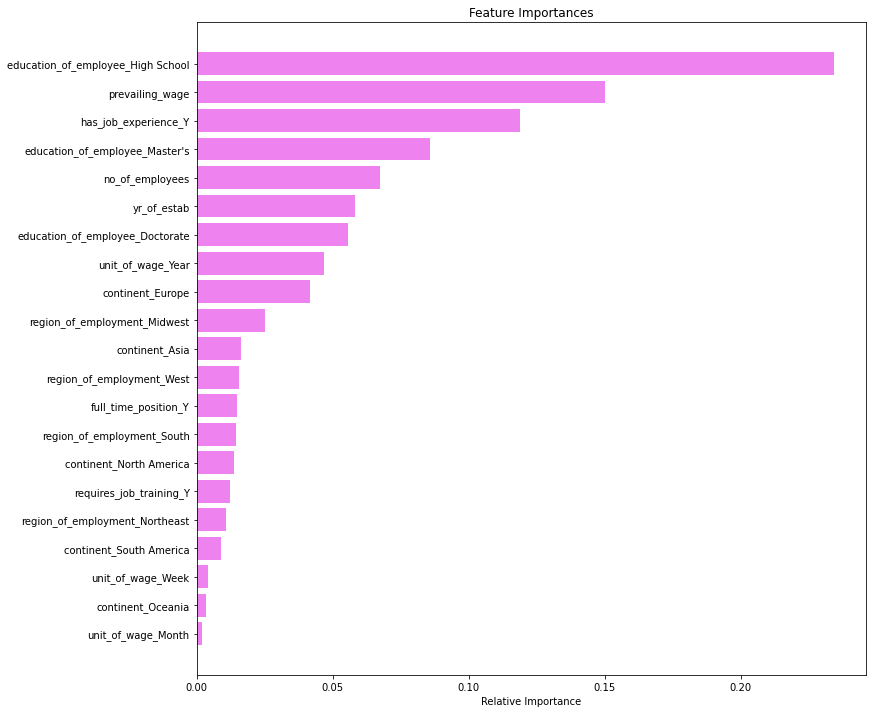

In [129]:
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Note: education of the employee (high school) is the most important feature in identifying weather the employee visa will be certified or denied followed by job experience and prevailing wage.

# Actionable Insights and Recommendations

*. The Decsion Tree and bagging classifiers were overfitting the training data

*. All the boosting models except for xgboost classifier were giving a more generalized perfomance

*. The stacking classifier also gave a good and genertalized performance

*. The highest F1 score for out of sample data is 0.821159 derived from the Gradient Boosting Init.(ie Gradient Boosting with AdaBoost classifier as the estimator for initial predictions)

*. Our best model is the model from Random Forest Tuned and I will make our recommendations based on it.

*. The model built can be used to predict if a prospective employee will be granted visa or not and can correctly identify 82.1% of certified employees.

*. Education of the employee (high school) is the most important feature in identifying weather the employee visa will be certified or denied followed by job experience and prevailing wage.

        *. Special attention should be given to these variables.
*. Almost all employees with doctorate degree had there visas certified except for the unlucky 12.7%

        *. Prospective employees with such degree should be a priotity
*. Sothern and western regions are more drawn to employees with bachelor's degree

        *. This factor should be taken into consideration when granting to denying visas to employees
*. Europe has the highest number of certified employees with 79.2% of them having been granted visa

        *. This implies that europeans are more qualifed and visa friendly that other continents
        *. Recruiters should keep an eye on european candidates
*. People with job experiece stand more chances of having thier visa certified

*. Employees with yearly unit wage stand more chance of having thier visas granted

# APPENDIX
### Analysis derived from EDA and data overview

*. There are 25,480 rows and 12 columns in our dataset

*. There are 3 numerical type columns while the rest are object type

*. There are no missing values in our dataset

*. There are no duplicate values in our dataset

*. The minimum number of employees has a negative value (-26) which is logically imposible. it shall be treated

*. About 75% of the employers companies were established on or before the year 2005

*. Most of the employee are from Asia

*. 10234 of the employees have a Bachelor's degree.

*. More than half of the employees require job traning

*. 22773 of the employees are in full time position

*. 33 rows have their number of employees as negative in our dataset

*. Most of the companies have about 5000 employees or less

*. Only a few occupation had a prevailing wage greater than $200,000

*. There are 176 observations with less than 100 prevailing wages

*. 66.2% of the applicants Asians

*. Only 0.8% of of the employees are from Oceania

*. of the employees are either bachelor's degree holders or Master's degree holders

*. Only 8.6% of employees have a Doctorate degree

*. 58.1% of the employees have job experience

*. 88.4% of employees do not require job training

*. Most of the employees prefer to work in the Northeastern, Southern and Western region of the USA

*. 1.5% of the employees prefer to work in the Island

*. 89.4% of the employee go for full-time position

*. 33.2% of the employees were denied visa into the U.S while 66.8% were certified.

*. From the heat map, all the columns with numeric types are not correlated

*. 62.7% of employees whose visas were certified had bachalor's degree.

*. Almost all employees with docotate degree had there visas certified except for the unlucky 12.7%

*. 78% of master's degree holders were granted visa

*. southern and western regions are more drawn to employees with bachelor's degree

*. 75.5% of employee of midwest region had their visa certified

*. Europe has the highest number of certified employees with 79.2% of them having been granted visa

*. People with job experiece stand more chances of having thier visa certified

*. 74.47% of employees with job experience had their visa granted

*. Employees with no job experience require job training than those with prior job experience

*. The distribution of prevailing wage for both certified and denied employees are right skewed

*. There is no significat change in visa stutus due prevailing wage

*. The median prevailing wages are higher in the Midwestern and island regions

*. Employees with yearly unit wage stand more chance of having thier visas granted

# A general overview of Univariate visualization of our data

In [130]:
# converting the case status column back to its original state
df["case_status"] = df["case_status"].apply(
    lambda x: "Certified" if x == 1 else "Denied"
)

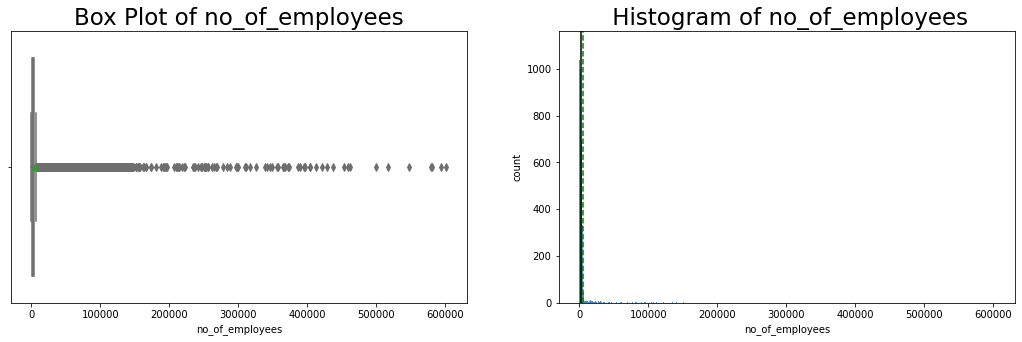

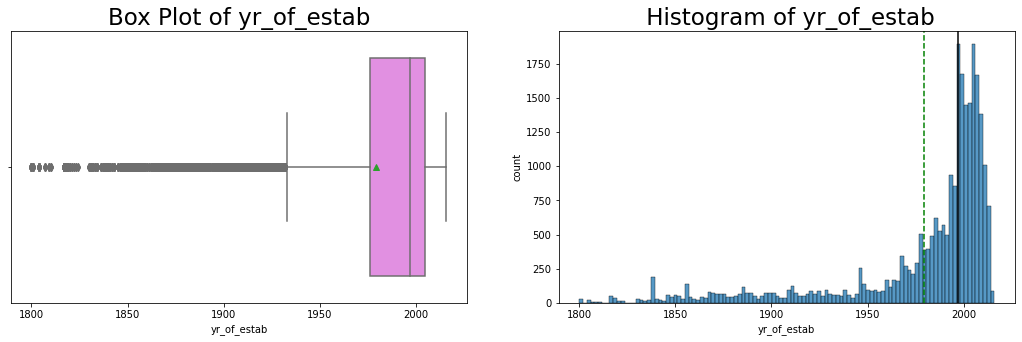

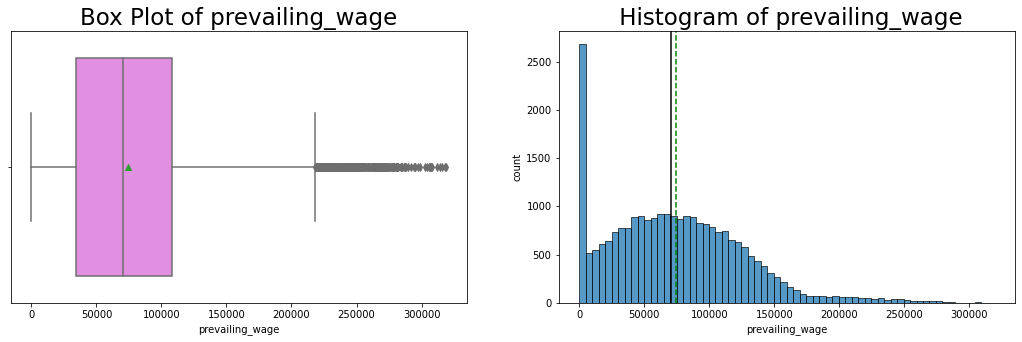

In [131]:
num_col_list = numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for col in num_col_list:
    print("")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
    # plotting the boxplot
    sns.boxplot(data=df, x=col, ax=ax1, showmeans=True, color="violet")
    ax1.set_title(f"Box Plot of {col}", fontsize=23)
    ax1.set_xlabel(col)

    # plotting the histogram
    sns.histplot(data=df, x=col, kde=False, ax=ax2)
    ax2.set_title(f" Histogram of {col}", fontsize=23)
    ax2.set_xlabel(col)
    ax2.set_ylabel("count")
    ax2.axvline(df[col].mean(), color="green", linestyle="--")
    ax2.axvline(df[col].median(), color="black", linestyle="-")

    plt.show()
    print("")
    print("")

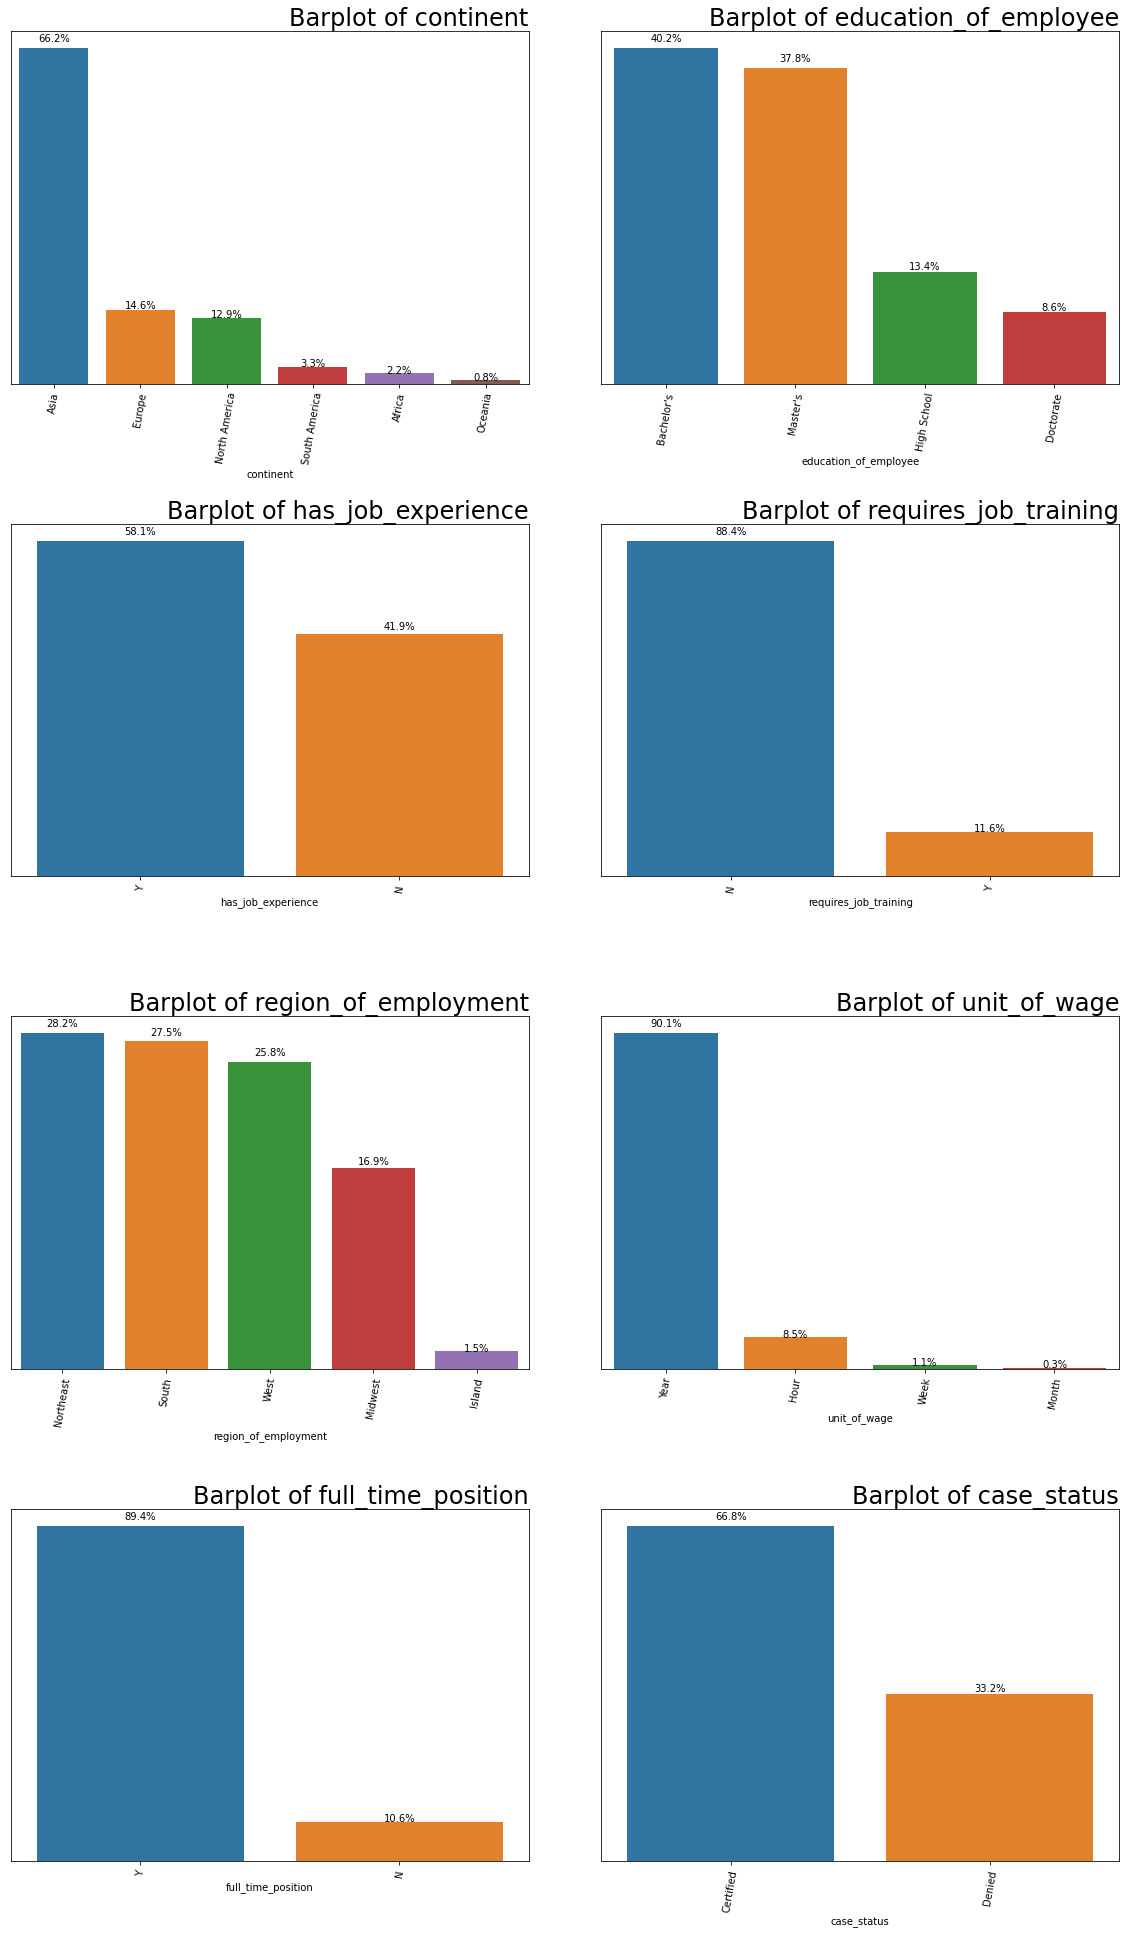

In [132]:
cat_cols = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
    "case_status",
]


df_cat_col = df[cat_cols]
plt.figure(figsize=(16, 40))
for i, variable in enumerate(cat_cols):
    total = len(df[variable])  # length of the column
    count = df[variable].nunique()
    plt.subplot(6, 2, i + 1)
    # ax=df_cat_col[variable].value_counts().plot(kind='bar', color=['r','b','g','orange','pink'] )
    ax = sns.countplot(
        data=df_cat_col, x=variable, order=df[variable].value_counts().index[:count]
    )

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        label = "{:.1f}%".format(100 * p.get_height() / total)
        x, y = p.get_xy()
        ax.annotate(f"{label}", (x + width / 2, y + height * 1.02), ha="center")
    plt.xticks(rotation=80)
    plt.tight_layout(pad=2)
    plt.title(f"Barplot of {variable}", fontsize=24, loc="right")
    plt.yticks([])  # this removes the yticks
    plt.ylabel("")  # this removes the ylabel('counts')


plt.show()

# A general overview of Bivariate visualization of our data

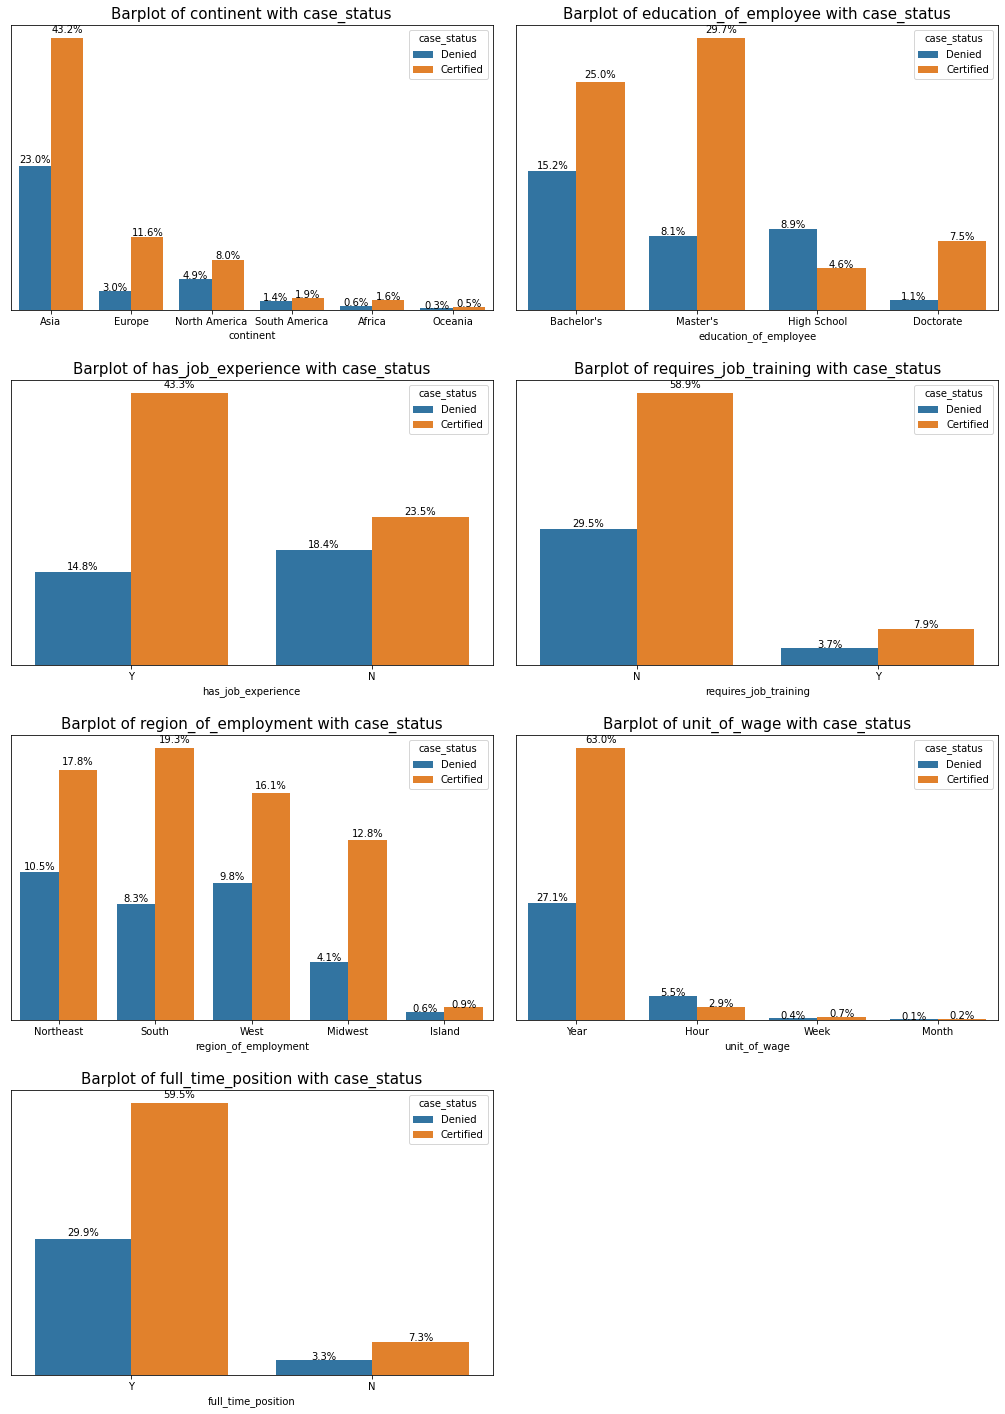

In [133]:
target_col = "case_status"
cat_cols = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
]
df_cat_col = df[cat_cols]
plt.figure(figsize=(15, 20))
for i, variable in enumerate(cat_cols):
    total = len(df[variable])  # length of the column
    count = df[variable].nunique()
    plt.subplot(4, 2, i + 1)
    # ax=df_cat_col[variable].value_counts().plot(kind='bar', color=['r','b','g','orange','pink'] )
    # ax=sns.countplot(data=df_cat_col, x=variable, order=data[variable].value_counts().index[:count])
    ax = sns.countplot(
        data=df_cat_col,
        x=variable,
        hue=df["case_status"],
        order=df[variable].value_counts().index[:count],
    )

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        label = "{:.1f}%".format(100 * p.get_height() / total)
        x, y = p.get_xy()
        ax.annotate(f"{label}", (x + width / 2, y + height * 1.02), ha="center")
    # plt.xticks(rotation=80)
    plt.tight_layout(pad=2)
    plt.title(f"Barplot of {variable} with {target_col}", fontsize=15)
    plt.yticks([])  # this removes the yticks
    plt.ylabel("")  # this removes the ylabel('counts')

plt.show()

# The End !!!